Initial shape: (842, 14)
                             mql_id                         seller_id                            sdr_id                             sr_id             won_date business_segment      lead_type  \
0  5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06  a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe  2018-02-26 19:58:54              pet  online_medium   
1  a555fb36b9368110ede0f043dfc3b9a0  bbb7d7893a450660432ea6652310ebb7  09285259593c61296eef10c734121d5b  d3d1e91a157ea7f90548eef82f1955e3  2018-05-08 20:17:59  car_accessories       industry   
2  327174d3648a2d047e8940d7d15204ca  612170e34b97004b3ba37eae81836b4c  b90f87164b5f8c2cfa5c8572834dbe3f  6565aa9ce3178a5caf6171827af3a9ba  2018-06-05 17:27:23  home_appliances     online_big   
3  f5fee8f7da74f4887f5bcae2bafb6dd6  21e1781e36faf92725dde4730a88ca0f  56bf83c4bb35763a51c2baab501b4c67  d3d1e91a157ea7f90548eef82f1955e3  2018-01-17 13:51:03       food_drink   online_small   
4  ff

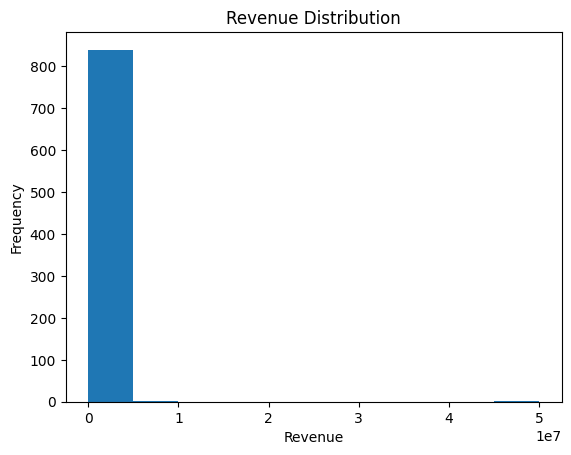

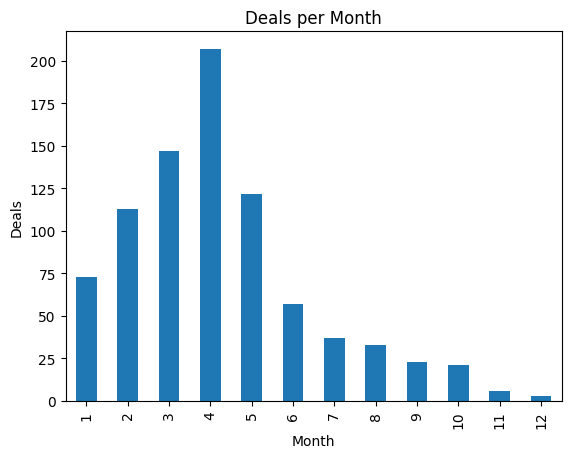


✅ Clean dataset saved successfully!


In [2]:
#==============================
# 1.Import Library
#==============================

import pandas as pd
import numpy as np

#=============================
#Display settings
pd.set_option("display.max_columns",None)
pd.set_option('display.width',200)

#=============================
#2.Load data
#============================

df=pd.read_csv(r"D:\SindhuSree\Desktop\Data Science\Future Interns\Task_03\olist_closed_deals_dataset.csv")

#=============================
print("Initial shape:",df.shape)
print("=============================")
print(df.head())
print("=============================")
df.info()

#============================
# 3.Standardized Column names
# ===========================

df.columns=(df.columns.str.strip().str.lower().str.replace(" ","_"))
#===========================
# Checking duplicates
#===========================
print("Duplicates:", df.duplicated().sum())

#===========================
#4.Remove Duplicates
#===========================


df.drop_duplicates(inplace=True)

print("Shape after removing duplicates:", df.shape)

# ==============================
# 5. HANDLE MISSING VALUES
# ==============================

drop_cols = ['has_company','has_gtin','average_stock']

for col in drop_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df[col] = df[col].fillna(0)

# ==============================
# 6. DATE CONVERSION
# ==============================

if 'won_date' in df.columns:
    df['won_date'] = pd.to_datetime(df['won_date'], errors='coerce')

# ==============================
# 7. FIX DATA TYPES
# ==============================

if 'declared_monthly_revenue' in df.columns:
    df['declared_monthly_revenue'] = pd.to_numeric(
        df['declared_monthly_revenue'], errors='coerce'
    )

# ==============================
# 8. FEATURE ENGINEERING
# ==============================

if 'won_date' in df.columns:
    df['year'] = df['won_date'].dt.year
    df['month'] = df['won_date'].dt.month

# ==============================
# 9. OUTLIER CHECK
# ==============================

if 'declared_monthly_revenue' in df.columns:
    print("\nRevenue Stats:")
    print(df['declared_monthly_revenue'].describe())

# ==============================
# 10. SUMMARY STATISTICS
# ==============================

print("\nStatistical Summary:")
print(df.describe())

# ==============================
# 11. BUSINESS SEGMENT DISTRIBUTION
# ==============================

if 'business_segment' in df.columns:
    print(df['business_segment'].value_counts())

# ==============================
# 12. LEAD TYPE DISTRIBUTION
# ==============================

if 'lead_type' in df.columns:
    print(df['lead_type'].value_counts())

# ==============================
# 13. MONTHLY DEALS TREND
# ==============================

if 'month' in df.columns:
    monthly = df.groupby('month').size()
    print(monthly)
# ==============================
# 14. VISUALIZATIONS
# ==============================

import matplotlib.pyplot as plt
if 'declared_monthly_revenue' in df.columns:
    plt.figure()
    plt.hist(df['declared_monthly_revenue'])
    plt.title("Revenue Distribution")
    plt.xlabel("Revenue")
    plt.ylabel("Frequency")
    plt.show()

if 'month' in df.columns:
    plt.figure()
    df.groupby('month').size().plot(kind='bar')
    plt.title("Deals per Month")
    plt.xlabel("Month")
    plt.ylabel("Deals")
    plt.show()
# ==============================
# 15. SAVE CLEAN DATA
# ==============================

df.to_csv("cleaned_deals.csv", index=False)

print("\n✅ Clean dataset saved successfully!")
